Notebook to visualize the contents (json files) of RVIZ_DIR. These json files represnent runt dags used to process transform data.

In [1]:
import sys
import os
from os import sep
from os.path import dirname, realpath
from pathlib import Path
from itertools import product, zip_longest, chain
from collections import Mapping
import logging

def get_cwd(fname, subdir, crunch_dir=realpath(Path.home()) +sep +'crunch' +sep):
    """
    Convenience function to make a directory string for the current file based on inputs.
    Jupyter Notebook in Anaconda invokes the Python interpreter in Anaconda's subdirectory
    which sis why changing sys.argv[0] is necessary. In the future a better way to do this
    should be preferred..
    """
    return crunch_dir +subdir +fname

def fix_path(cwd):
    """
    Convenience function to fix argv and python path so that jupyter notebook can run the same as
    any script in crunch.
    """
    sys.argv[0] = cwd
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

fix_path(get_cwd('viz_trmi.ipynb', 'mutate' +sep))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit, vectorize, float64, uint
from scipy.stats import zscore
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA, FactorAnalysis
from sortedcontainers import SortedList, SortedSet 
from graphviz import Digraph

from ipywidgets import interact, interactive, fixed
from IPython.display import display, Image

pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 50)

from common_util import DT_HOURLY_FREQ, DT_CAL_DAILY_FREQ, DT_BIZ_DAILY_FREQ, window_iter, col_iter, all_equal, list_get_dict, get_custom_biz_freq, get_custom_biz_freq_df, query_df, search_df, chained_filter, benchmark
from common_util import MUTATE_DIR, dict2dag, load_json, is_type, df_rows_in_year, isnt, find_numbers, outer_join, left_join, count_nn_df, count_nz_df, count_nn_nz_df, pairwise, cust_count, suffix_map
from data.data_api import DataAPI
from mutate.common import RVIZ_DIR
from mutate.runt import get_rm_keychain, apply_rm
DataAPI.__init__()
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

CRITICAL:root:script location: /home/kev/crunch/mutate/viz_trmi.ipynb
CRITICAL:root:using project dir: /home/kev/crunch/


In [6]:
graph_viz_files = os.listdir(RVIZ_DIR)

In [20]:
def gviz_display(gdict, name, dump=True):
    gviz = dict2dag(gdict, remap={}, list_max=5, \
             name=name, engine='dot', format='png', node_attr={'shape': 'record'}, \
             graph_attr={'overlap': 'false', 'label': '', 'fontsize': '20'})
    display(name)
    display(gviz)
    if (dump):
        gviz.render(RVIZ_DIR +name)

'graph-base'

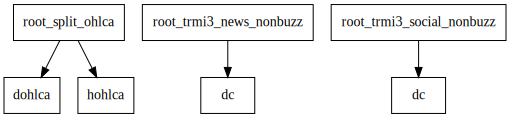

'graph-feat-hourly'

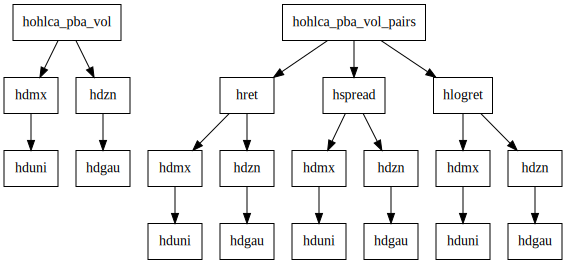

'graph-feat-daily'

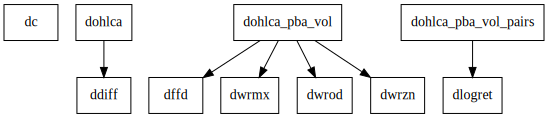

'graph-label'

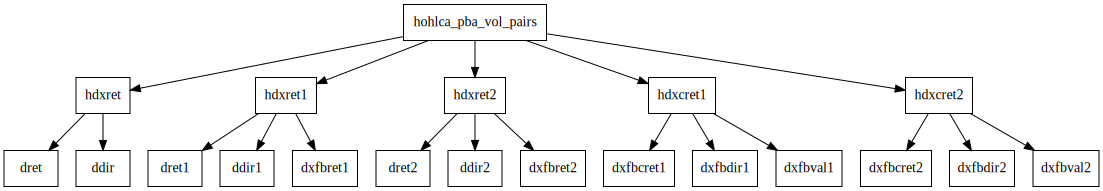

In [22]:
for fname in os.listdir(RVIZ_DIR):
    gviz_display(load_json(fname, dir_path=RVIZ_DIR), fname[:-5], dump=True)